In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log_names = ['epoch','seconds','loss','top-1 Acc','top-5 Acc','F1-Score','Precision','Recall']

deit_train = pd.read_csv('../../networks/birds_deit/logs_train.csv',sep=';')
levit_train = pd.read_csv('../../networks/birds_levit/logs_train.csv',sep=';')
effnet_train = pd.read_csv('../../networks/birds_effnet/logs_train.csv',sep=';')

deit = pd.read_csv('../../networks/birds_deit/logs_valid.csv',sep=';')
levit = pd.read_csv('../../networks/birds_levit/logs_valid.csv',sep=';')
effnet = pd.read_csv('../../networks/birds_effnet/logs_valid.csv',sep=';')

deit_npt = pd.read_csv('../../networks/birds_deit_npt/logs_valid.csv',sep=';')
deit_npt_train = pd.read_csv('../../networks/birds_deit_npt/logs_train.csv',sep=';')

In [27]:
def plot_by_epoch(col):
    plt.plot(deit['epoch'], deit[col])
    plt.plot(levit['epoch'], levit[col])
    plt.plot(effnet['epoch'], effnet[col])
    plt.grid(True)
    plt.legend(['Deit','LeViT','EffNet'])

def plot_by_time(col, offset = True):
    deit_offset = deit['seconds'][0] if offset else 0
    deit_x = deit['seconds'].cumsum() - deit_offset 
    
    levit_offset = levit['seconds'][0]  if offset else 0
    levit_x = levit['seconds'].cumsum() - levit_offset
    
    effnet_offset = effnet['seconds'][0] if offset else 0
    effnet_x = effnet['seconds'].cumsum() - effnet_offset

    
    plt.plot(deit_x ,deit[col])
    plt.plot(levit_x ,levit[col])
    plt.plot(effnet_x ,effnet[col])
    plt.grid(True)
    plt.legend(['Deit','LeViT','EffNet'])

# Training

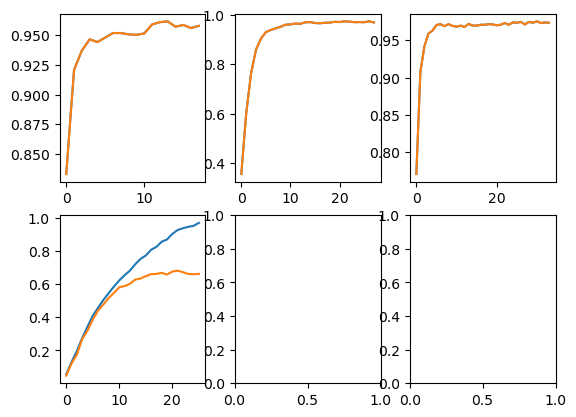

In [23]:
fig, axs = plt.subplots(2,3)
axs[0,0].plot(deit_train['epoch'], deit['top_1_acc'])
axs[0,0].plot(deit['epoch'], deit['top_1_acc'])

axs[0,1].plot(levit_train['epoch'], levit['top_1_acc'])
axs[0,1].plot(levit['epoch'], levit['top_1_acc'])

axs[0,2].plot(effnet_train['epoch'], effnet['top_1_acc'])
axs[0,2].plot(effnet['epoch'], effnet['top_1_acc'])

axs[1,0].plot(deit_npt_train['epoch'], deit_npt_train['top_1_acc'])
axs[1,0].plot(deit_npt['epoch'], deit_npt['top_1_acc'])

# Comparison on Validation Set

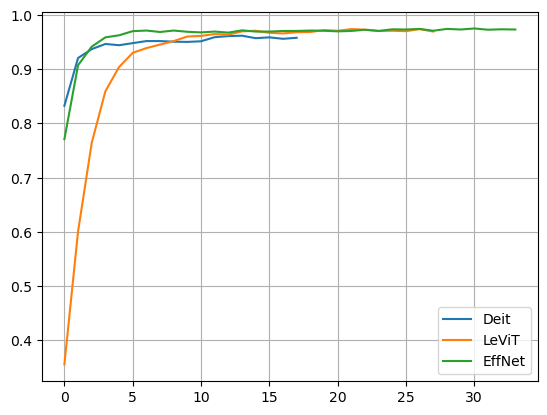

In [28]:
plot_by_epoch('top_1_acc')

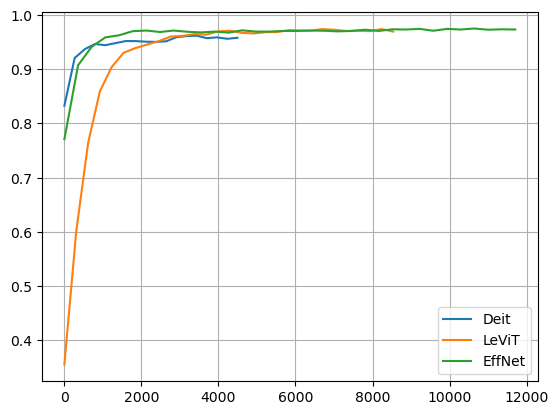

In [6]:
plot_by_time('f1_score',True)

In [7]:
def calculate_median(column):
    print("median")
    print(f"effnet: \t{effnet[column].median()}")
    print(f"levit:  \t{levit[column].median()}")
    print(f"deit:   \t{deit[column].median()}")

In [8]:
calculate_median('seconds')

median
effnet: 	354.4660017490387
levit:  	307.47423219680786
deit:   	264.06271636486053


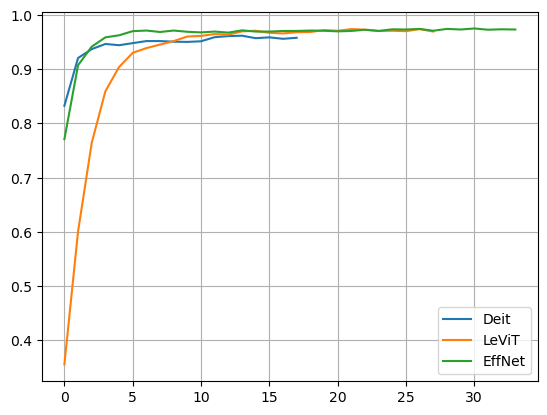

In [9]:
plot_by_epoch('f1_score')

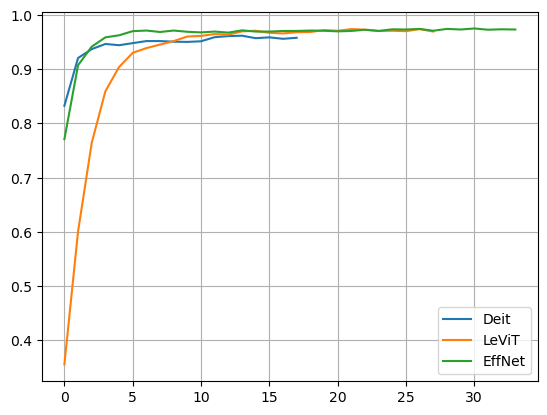

In [10]:
    plt.plot(deit['epoch'],deit["top_1_acc"])
    plt.plot(levit['epoch'],levit["top_1_acc"])
    plt.plot(effnet['epoch'],effnet["top_1_acc"])
    plt.grid(True)
    plt.legend(['Deit','LeViT','EffNet'])

In [11]:
# eher mehr epochen trainieren

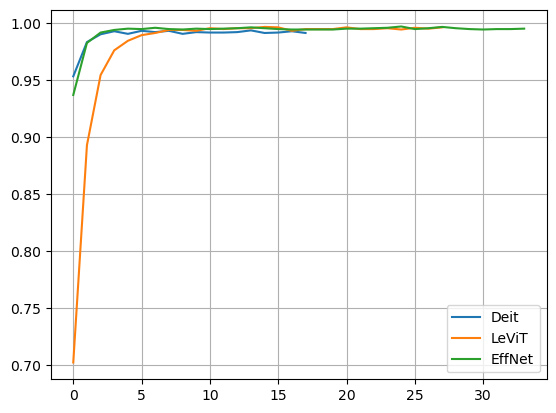

In [12]:
plot_by_epoch('top_5_acc')

In [13]:
effnet

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
0,0,1588.622821,0.105480,0.771048,0.937143,0.771048,0.771048,0.771048
1,1,355.587255,0.035272,0.907429,0.982857,0.907429,0.907429,0.907429
2,2,355.631360,0.018689,0.941714,0.992000,0.941714,0.941714,0.941714
3,3,353.735453,0.013419,0.958857,0.994286,0.958857,0.958857,0.958857
4,4,354.724470,0.010945,0.962667,0.995429,0.962667,0.962667,0.962667
5,5,355.047789,0.009160,0.970286,0.995048,0.970286,0.970286,0.970286
6,6,354.454697,0.008707,0.971429,0.996190,0.971429,0.971429,0.971429
7,7,354.705882,0.008332,0.968762,0.995048,0.968762,0.968762,0.968762
8,8,354.422994,0.007931,0.971429,0.994667,0.971429,0.971429,0.971429
9,9,358.076797,0.007996,0.969143,0.995429,0.969143,0.969143,0.969143


KeyError: 'loss'

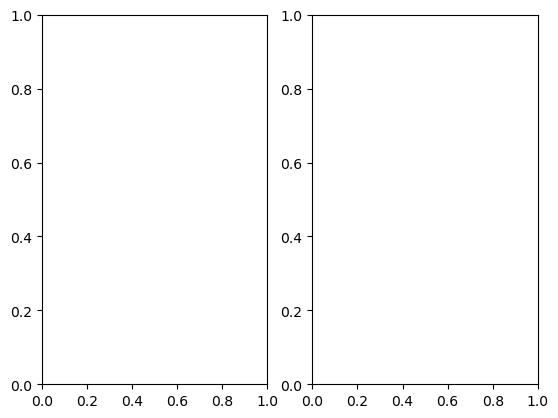

In [29]:
fig, axs = plt.subplots(1,2)

axs[0].plot(deit_npt_train['avr_loss'])
axs[0].plot(deit_npt['avr_loss'])
axs[0].legend(['train','valid'])
axs[0].set_xlabel('Epochen')
axs[0].set_ylabel('Loss')
axs[0].grid(True)

axs[1].plot(deit_npt_train['top_1_acc'])
axs[1].plot(deit_npt['top_1_acc'])
axs[1].legend(['train','valid'])
axs[1].set_xlabel('Epochen')
axs[1].set_ylabel('top-1 Acc')
axs[1].grid(True)


In [ ]:
plt.